In [1]:
import pandas as pd

In [2]:
df_pred = pd.read_csv('bert_output/test_results.tsv', sep='\t', header=None)

In [3]:
prediction = []
pred_int = []
for i, r in df_pred.iterrows():
    if r[0] > r[1]:
        pred_int.append(0)
        prediction.append('spam')
    else:
        pred_int.append(1)
        prediction.append('ham')
df_pred['pred_int'] = pd.Series(pred_int)
df_pred['prediction'] = pd.Series(prediction)

In [4]:
pred = df_pred['pred_int']

In [5]:
df_pred.to_csv('bert_output/test_results_with_label.tsv', sep='\t', header=None,index=False)

In [6]:
df_actual = pd.read_csv('data/sms.tsv', sep='\t')

In [7]:
df_test_actual = df_actual[5015: 5575]

In [8]:
pred_actual = df_test_actual['label']

In [9]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
np.set_printoptions(precision=2)

In [10]:
target_names = df_test_actual['label'].unique()

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as sm
dict_accuracy_score = {}
def check_metrics(pred, model):
    accuracy_score = sm.accuracy_score(pred_actual, pred)
    cm = confusion_matrix(pred_actual, pred)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=target_names,title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')

    plt.show()
    print('\n')

    print("Classification report is")
    
    print(classification_report(pred_actual, pred))
    print()
    print("Accuracy score is ", str(accuracy_score))
    dict_accuracy_score[model] = accuracy_score

Confusion matrix, without normalization
[[ 69   3]
 [  0 487]]
Normalized confusion matrix
[[0.96 0.04]
 [0.   1.  ]]


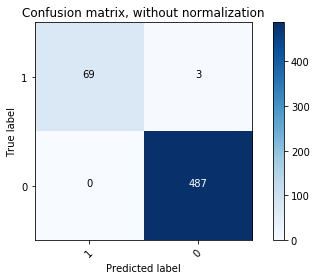

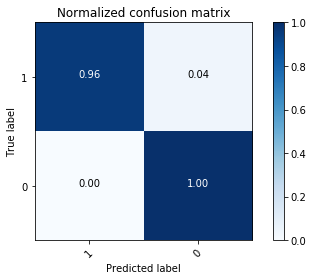



Classification report is
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        72
           1       0.99      1.00      1.00       487

   micro avg       0.99      0.99      0.99       559
   macro avg       1.00      0.98      0.99       559
weighted avg       0.99      0.99      0.99       559


Accuracy score is  0.9946332737030411


In [12]:
check_metrics(pred, "bert")

In [13]:
dict_accuracy_score

{'bert': 0.9946332737030411}

In [14]:
with open('bert_output/test_accuracy.txt', 'w') as file:
    file.write("test_accuracy = " + str(dict_accuracy_score['bert']))